# Introduction to the Gate Model of Quantum Computing

**Author**: Ben Hall

## Imports

In [1]:
"""Imports and notebook setup."""
import math
import cmath
import warnings

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from numpy import linalg as la
import qiskit
from qiskit import (Aer, BasicAer, execute, ClassicalRegister, QuantumCircuit, QuantumRegister)
from qiskit.providers.aer import UnitarySimulator

%matplotlib inline

In [2]:
_req_ver = "0.9.0"
if _req_ver not in qiskit.__version__:
    warnings.warn(
        "This code is written for Qiskit version {}".format(_req_ver) +
        "Your code may not execute properly."
    )

## Ingredients

$\textbf{Qubits}$ are states of a two-level quantum system and are represented as vectors in $\mathbb{C}^2$. We define the two basis states as 
$$|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \hspace{5mm} |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$ A qubit $|q\rangle$ can be in a superposition of these two states
$$|q\rangle = a|0\rangle + b|1\rangle = \begin{pmatrix} a \\ b \end{pmatrix}$$
where $a,b \in \mathbb{C}$. When the qubit is measured, the probability of measuring it to be in state $|0\rangle$ is $|a|^2$ and $|1\rangle$ is $|b|^2$. So that the total probability is 1, we require that $|a|^2+|b|^2=1$.

$\textbf{Quantum Gates}$ represent physical actions that act on the qubits. They are represented by matrices in $U(2)$, the group of $2\times2$ unitary matrices with complex entries. A unitary matrix is a matrix $U$ such that $U^{\dagger}=U^{-1}$ where $\dagger$ means to both transpose the matrix and take the complex conjugate of each of its entries. Quantum gates must be unitary because they preserve $|a|^2+|b|^2=1$. (Prove this if you haven't before). Note that unitary matrices are always invertible. Thus, unlike classical computations, all quantum computations are reversible.

$\textbf{Quantum Circuits}$ are read left to right as follows:
- A qubit starts in an initial state $|\psi\rangle\in\mathbb{C}^2$
- The line extending to the right from $|\psi\rangle$ is called a "quantum wire".
- Any quantum gate $U\in U(2)$ on this wire is applied to this qubit.

Mathematically, applying a gate to a qubit is the same as multiplying the matrix representing the gate with the vector representing the state of the qubit. The quantum circuit below represents $|\psi\rangle\to U|\psi\rangle$. That is, the qubit starts in state $|\psi\rangle$ and ends in state $|U\psi\rangle$.

![Basic circuit](u-psi-circuit.jpg)

## 1 | Quantum Gates

### Hadamard Gate

The Hadamard gate is

$$ H \equiv \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$

It puts the basis states $|0\rangle$ and $|1\rangle$ into a superposition of the two

$$ H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 1 \end{pmatrix} 
= \frac{1}{\sqrt{2}}\left[\begin{pmatrix} 1 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 1 \end{pmatrix}\right] 
= \frac{|0\rangle + |1\rangle}{\sqrt{2}}
\equiv |+\rangle$$

$$ H|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ -1 \end{pmatrix} 
= \frac{1}{\sqrt{2}}\left[\begin{pmatrix} 1 \\ 0 \end{pmatrix} - \begin{pmatrix} 0 \\ 1 \end{pmatrix}\right] 
= \frac{|0\rangle - |1\rangle}{\sqrt{2}}
\equiv |-\rangle$$

In Qiskit, the Hadamard gate, $H$ is applied to qubit "q" of circuit "circ" with
```python
circ.h(q)
```

We can use the Hadamard gate in the circuit below:

In [3]:
"""Circuit for Hadamard gate."""
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
hadamard_circ = QuantumCircuit(q,c)

# Initialize to state 0
initial_state = [1,0]

# Initializes qubit q[0] to the initial state
hadamard_circ.initialize(initial_state,q[0])

# Apply Hadamard
hadamard_circ.h(q[0])

# Measure 
hadamard_circ.measure(q,c)

backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(hadamard_circ, backend, shots=1000).result() #run the circuit 1000x
hadamard_counts  = result.get_counts(hadamard_circ)
print("Counts =",hadamard_counts)

Counts = {'0': 486, '1': 514}


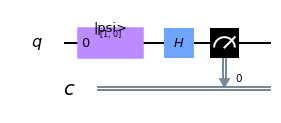

In [4]:
"""Draw the circuit"""
hadamard_circ.draw(output = 'mpl')

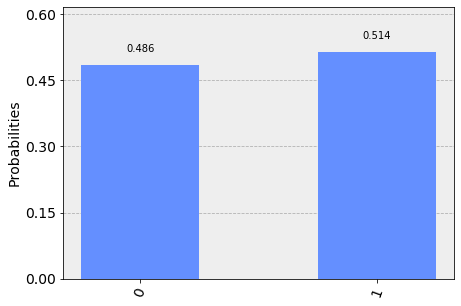

In [5]:
"""Plot the counts."""
qiskit.visualization.plot_histogram(hadamard_counts)

#### Exercise 1.1

___
Change the initial state to $|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$ by changing  
```python
initial_state = [1,0]
```
to 
```python
initial_state = [0,1]
```
in the code above. 

- Does this change the counts? Why not?

$\textit{Hint:}$ Recall that if the final state is $|\psi\rangle = a|0\rangle + b|1\rangle$ then the probability of measuring that the qubit is in state $|0\rangle$ or $|1\rangle$ is $|a|^2$ and $|b|^2$ respectively. So what are $a$ and $b$ for $|+\rangle$ and $|-\rangle$?
___

#### Exercise 1.2

___
Below you'll see that what does change is the bloch vector. Try running the following code with each initial state: $|0\rangle$ and $|1\rangle$.

- Why does the bloch vector go from the +x axis to the -x axis when you change the initial state from $|0\rangle$ to $|1\rangle$?

$\textit{Hint:}$ The state
$|\psi\rangle = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle $ where $\theta \in [0,\pi]$ and $\phi \in [0,2\pi)$ is represented on the Bloch sphere as the vector $v=(\sin\theta\cos\phi,\sin\theta\sin\phi,\cos\theta)$. That is, $\theta$ is the polar angle and $\phi$ is the azimuthal. What are $\theta$ and $\phi$ for $|+\rangle$ and $|-\rangle$?

Note: If $\psi = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle $ then $$P\left(|\psi\rangle=|0\rangle\right) = \left|\cos{\frac{\theta}{2}}\right|^2 = \cos^2{\frac{\theta}{2}}$$
and 
$$P\left(|\psi\rangle=|1\rangle\right) = \left|e^{i\phi}\sin{\frac{\theta}{2}}\right|^2 = \sin^2{\frac{\theta}{2}}$$

That is, the probabilities don't depend on $\phi$! Does that help explain why the histogram didn't change for $H|0\rangle$ versus $H|1\rangle$?
___

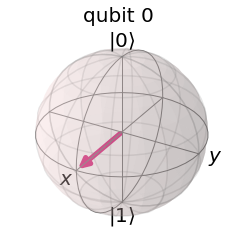

In [6]:
"""Final vector on the bloch sphere after applying Hadamard."""
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
hadamard_circ = QuantumCircuit(q,c)

# Initialize to state 0
initial_state = [1,0]

# Initializes qubit q[0] to the initial state
hadamard_circ.initialize(initial_state,q[0])

# Apply Hadamard
hadamard_circ.h(q[0])

# Visualize on the bloch sphere
backend = BasicAer.get_backend('statevector_simulator') 
result = execute(hadamard_circ, backend).result()
psi  = result.get_statevector(hadamard_circ)
qiskit.visualization.plot_bloch_multivector(psi)

#### Exercise 1.3

___
What happens when you apply two Hadamard gates? 

- First, multiply the matrix $H$ by itself. What do you get?
- Apply the rule to how H changes $|0\rangle$ and $|1\rangle$ twice. What do you get? Hint: $HH|0\rangle =H|+\rangle=H\frac{|0\rangle+|1\rangle}{\sqrt{2}}=\frac{H|0\rangle+H|1\rangle}{\sqrt{2}}= \ ...$ (Note that in the third equaltiy I used the fact that quantum gates are linear operators in the vector space of the qubit states. Verify this.)
- Change the code above to apply two Hadamards by changing 
```python
hadamard_circ.h(q[0])
```
to
```python
hadamard_circ.h(q[0])
hadamard_circ.h(q[0])
```
- Then look at the histogram and the bloch sphere. What happened? ($\textit{Hint:}$ was it nothing?)
- What is $H^{-1}$?
___

### Pauli Gates

The Pauli Gates are the same as the Pauli spin matrices:

$$ I \equiv \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \hspace{5mm} X \equiv \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \\ $$

$$ Y \equiv \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \hspace{5mm} Z \equiv \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \\ $$

One can work out how each of these matrices acts on the basis states $|0\rangle$ and $|1\rangle$ through matrix-vector multiplication. For example:

$$ X|0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle $$
$$ X|1\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle $$

Thus, sometimes the $X$ gate is refered to as the "bit-flip gate", it flips the qubit from $|0\rangle$ to $|1\rangle$ and vice-verse.

The Pauli gate $X$ is applied to qubit q of circuit circ with
```python
circ.x(q)
```
The $Y$ and $Z$ gates are applied analogously.

#### Exercise 1.4
___
Prove that the $Y$ and $Z$ acts on the basis states in the following way:

$$ Y|0\rangle = i|1\rangle \hspace{5mm} Y|1\rangle = -i|1\rangle $$
$$ Z|0\rangle = |0\rangle \hspace{5mm} Z|1\rangle = -|1\rangle $$

Note that $Y$ flips the qubit and introduces a phase. Meanwhile, $Z$ leaves $|0\rangle$ alone while flipping the sign of $|1\rangle$. It's action can be summarized as $Z|x\rangle = (-1)^x|x\rangle$ for $x=0,1$. Thus, sometimes $Z$ is refered to as the "parity gate" because its eigenvalues are -1 to the parity of its eigenvectors. Finally, note that the identity matrix $I$ leaves the qubit alone $I|x\rangle = |x\rangle$ for $x=0,1$. 
___

#### Exercise 1.5 
___
Since we know how the Pauli gates act on the basis states, we can write them in their outer-product representation. For example:

$$ X = |0\rangle\langle 1| + |1\rangle\langle 0| $$
since then
$$ X|0\rangle = |0\rangle\langle 1|0\rangle + |1\rangle\langle 0|0\rangle  = 0|0\rangle + 1|1\rangle = |1\rangle$$
and 
$$ X|1\rangle = |0\rangle\langle 1|1\rangle + |1\rangle\langle 0|1\rangle  = 1|0\rangle + 0|1\rangle = |0\rangle$$
What are the outer-product representations for $I,Y$, and $Z$?
___

The pauli gates can be thought of as the "basis gates" for all single-qubit gates. That is, any gate, a matrix $G\in U(2)$, can be written as a linear combination (with complex coefficients) of the Pauli gates. Additionally, the Puali matrices are linearly independent (when thought of as vectors in this vector space). Thus, the set $\{I,X,Y,Z\}$ spans $U(2)$. More mathematically, for any $G\in U(2)$ there exists $c_0,c_1,c_2,c_3 \in \mathbb{C}$ such that $G = c_0I + c_1X +c_2Y +c_3Z$. For example, the Hadamard gate can be written as

$$ H = \frac{X + Z}{\sqrt{2}} $$

That is, for $H$, $c_0,c_3 = 0$ and $c_1,c_2 = \frac{1}{\sqrt{2}}$.

Let's play around with the Pauli gates in Qiskit below:

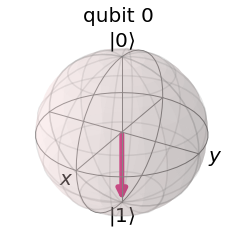

In [7]:
"""Circuit for Pauli Gates"""
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
pauli_circ = QuantumCircuit(q,c)

# Initialize to state 0 or 1 ([1,0] or [0,1], respectfully)
initial_state = [1,0] 
pauli_circ.initialize(initial_state,q[0])

# Apply a pauli (x, y, or z)
pauli_circ.x(q[0])
# pauli_circ.y(q[0])
# pauli_circ.z(q[0])

### OUTPUT ### 

# Visualize on the bloch sphere
backend = BasicAer.get_backend('statevector_simulator') 
result = execute(pauli_circ, backend).result()
psi  = result.get_statevector(pauli_circ)
qiskit.visualization.plot_bloch_multivector(psi)

Note that with the Pauli gates, we can only ever take the basis states ($|0\rangle$ and $|1\rangle$) to themselves (up to a phase), and never into a superposition of the basis states (like the Hadamard gate does). Thus, the Bloch sphere always looks pretty boring, either pointing to $|0\rangle$ or $|1\rangle$. To see something more interesting, let's act the Pauli's on the states
$$ |+\rangle \equiv \frac{|0\rangle+|1\rangle}{\sqrt{2}} \hspace{5mm} |-\rangle \equiv \frac{|0\rangle-|1\rangle}{\sqrt{2}} $$
Recall that these can be prepared by the Hadamard matrix:
$$ H|0\rangle = |+\rangle \hspace{5mm} H|1\rangle = |-\rangle $$

Let's see how $X$ and $Z$ act on $|+\rangle$ and $|-\rangle$. Note that
$$ X|+\rangle = X\frac{|0\rangle+|1\rangle}{\sqrt{2}} = \frac{X|0\rangle+X|1\rangle}{\sqrt{2}} = \frac{|1\rangle+|0\rangle}{\sqrt{2}} = \frac{|0\rangle+|1\rangle}{\sqrt{2}} = |+\rangle $$
$$ X|-\rangle = X\frac{|0\rangle-|1\rangle}{\sqrt{2}} = \frac{X|0\rangle-X|1\rangle}{\sqrt{2}} = \frac{|1\rangle-|0\rangle}{\sqrt{2}} = -\frac{|0\rangle-|1\rangle}{\sqrt{2}} = -|-\rangle $$
Note that, $|+\rangle$ and $|-\rangle$ are eigenstates of $X$ just as $|0\rangle$ and $|1\rangle$ are eigenstates of $Z$. This is because the eigenstates lie along the Bloch sphere axis corresponding to the Pauli gate ($|+\rangle$ lies on the $x$-axis and $|0\rangle$ lies on the $y$-axis). What are the eigenstates of $Y$?

### Exercise 1.6
___
Show that
$$Z|+\rangle=|-\rangle$$
$$Z|-\rangle=|+\rangle$$
Check your answer by modifying the code above to prepare the state $|+\rangle$, applying $Z$, and checking that you end up in the $|-\rangle$ state. Do this by setting
```python
initial_state = [1/math.sqrt(2),1/math.sqrt(2)] 
```
Also, why do the vectors for $|+\rangle$ and $|-\rangle$ point the way they do on the Bloch sphere?
___
Note that, by applying $H$ to rotate our basis states from $|0\rangle$ and $|1\rangle$ to $|+\rangle$ and $|-\rangle$, the roles of $X$ and $Z$ have exactly switched! $X$ is now the parity gate and $Z$ is the bit-flip gate. Recall that $H = \frac{X + Z}{\sqrt{2}}$. Coincidence? No! It turns out that $H$ is a rotation around the axis that points exactly halfway between the $x$-axis and the $z$ axis, hence switching the $x$ and $z$ axis. To understand this we'll need to introduce rotation gates.

### Rotation Gates

What if we want the Bloch vecotor to point to an arbitrary point on the surface of the Bloch sphere? That's where rotation gates come in! Rotation gates rotate the Bloch vector by an angle $\theta$ around the axis corresponding to a given Pauli-gate. They are the complex exponentiation of the Pauli gates and are defined as follows:

$$ R_x(\theta) \equiv e^{-i\theta X/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}X 
= \begin{pmatrix} \cos\frac{\theta}{2} & -i\sin\frac{\theta}{2} \\ -i\sin \frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix} $$
$$ R_y(\theta) \equiv e^{-i\theta Y/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}Y 
= \begin{pmatrix} \cos\frac{\theta}{2} & -\sin\frac{\theta}{2} \\ \sin \frac{\theta}{2} & \cos\frac{\theta}{2} \end{pmatrix} $$
$$ R_z(\theta) \equiv e^{-i\theta Z/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}Z 
= \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix} $$

So, for example, $R_x(\theta)$ rotates the Bloch vector by an angle $\theta$ around the $x$-axis.

Note that we've use the fact that $e^{i\theta G}=\cos\theta I + i\sin\theta G$ for any involutory matrix $G$ (that is $G^2=I$). $\textit{Why is this true?}$ Convince yourself that the Pauli gates are involutary.

The rotation gate $R_x(\theta)$ is applied to qubit q of circuit circ with
```python
circ.rx(theta,q)
```
$R_y$ and $R_z$ are applied analagously.

$\textbf{ZYZ Decomposition}$

It turns out that for any unitary single qubit gate $U$, there exists $\alpha,\beta,\gamma,\delta\in\mathbb{R}$ such that

$$ U = e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta) $$ 

That is, any single qubit gate can be written as a product of at most 3 rotation gates (up to a global phase $\alpha$ - which we'll find out later doesn't matter)! 

Let's use Qiskit to see how the rotation gates $\textit{rotate}$ the state-vector around the Bloch sphere: Pick a rotation gate and rotation angle. Then look at the Bloch sphere.

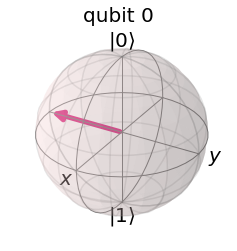

In [8]:
"""Circuit for Rotation Gates"""
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
rotation_circ = QuantumCircuit(q,c)

## Initialization: All qubits are, by defult, inizialised to |0>. But, since we now know that X|0> = |1>,
## we can use the X gate to initialize our circuit to 1 instead of 0.
## So, uncomment the line below if you want to inizialize to the |1> state.
# puali_circ.x(q[0])

# Pick an angle, theta, betwee 0 and pi
pi = np.pi
theta = pi/2 # Change me

# Apply a rotation gate (R_x,R_y,R_z)
rotation_circ.rx(theta,q[0])
# rotation_circ.ry(theta,q[0])
# rotation_circ.rz(theta,q[0])

### OUTPUT ### 

# Visualize on the bloch sphere
backend = BasicAer.get_backend('statevector_simulator') 
result = execute(rotation_circ, backend).result()
psi  = result.get_statevector(rotation_circ)
qiskit.visualization.plot_bloch_multivector(psi)

### Exercise 1.6
___
What sequence of three rotation gates will take you from 
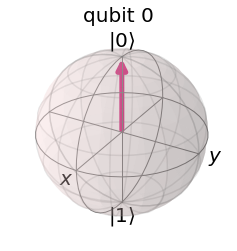 to 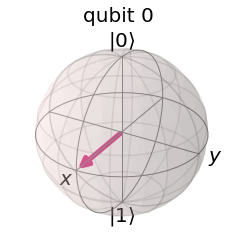 to 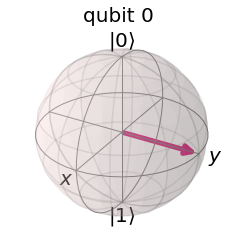 and then back to 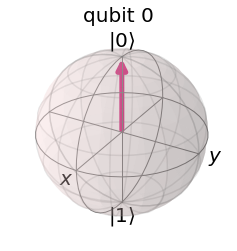
$\textit{Hint:}$ A positive rotation around an axis corresponds to the way your fingers curl when you point the thumb of your right hand along the positive direction of that axis.
Check your answer with Qiskit by changing the "Apply a rotation gate" section of the code above to implement your gates.
___

### Exercise 1.7 
___
Uncomment the histogram section of the code above to plot the histogram of counts after applying an $x$-rotation by various angles. In terms of $\theta$, what is $P(|0\rangle)$ and $P(|1\rangle)$ for $R_x(\theta)|0\rangle$? Check your answer against some histograms for various angles (for example, $\theta=\pi/3$ is easy to do in your head).

$\textit{Hint:}$ Note that $R_x(\theta)|0\rangle= \left(\cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}X \right)|0\rangle$ Then use your knowledge of how $I$ and $X$ act on $|0\rangle$.
___

### Exercise 1.8 (Advanced)
___
This exercise is a bit more advanced and so optional - but remember how we said earlier that Hadamard is a rotation about the axis $\frac{X+Z}{\sqrt{2}}$? Let's prove that. Show that 
$$ e^{-i\theta H/2} = \begin{pmatrix} e^{-i\theta/2} & -i\sin\frac{\theta}{2} \\ -i\sin\frac{\theta}{2} & e^{i\theta/2} \end{pmatrix} $$
$\textit{Hint:}$ Note that $H$ is involutary ($H^2=I$), so we can use the same trick as was used to derive the rotation gates.

What must $\theta$ be in order for $e^{-i\theta H/2}$ to equal $H$? Trick question! No such angle exists such that $e^{-i\theta H/2}=H$ but we can find $\theta$ such that this is true up to a global phase. That is, there exists an angle $\theta$ such that $e^{-i\theta H/2}=e^{i\phi}H$ for some $\phi$. What is this angle? $\textit{Hint:}$ The global phase is $e^{i\phi}=-i$. That is, what is $\theta$ such that $e^{-i\theta H/2}=-iH$?

Now, why is it OK that we got $-iH$ instead of $H$. Well, because $\textit{global phases don't matter}$, as will be explained below. One other thing to notice: rotating around the axis $\frac{X+Z}{\sqrt{2}}$ is not the same as rotating around the axis $X$ and then the axis $Z$. That's because 
$$e^{X+Z}\neq e^{X}e^{Z}$$ 
This is because $[X,Z]\neq0$. In fact, $e^{A+B}=e^Ae^B$ if and only if $[A,B]=0$. By the way, if you haven't seen it before, $[A,B]\equiv AB-BA$ and is called the $\textit{commutator}$ of $A$ and $B$. What does $[X,Z]$ equal?
___

$\textbf{Global phases don't matter.}$ Applying global phase to a qubit conisists of taking $|q\rangle$ to $e^{i\alpha}|q\rangle$. Why don't they matter in quantum computing? Because global phases don't change the measurement probabilites, the only information we can actually get out of our quantum computer. Why? Consider an arbitrary qubit $|q\rangle = a|0\rangle+b|1\rangle$. Say a sequnce of gates is applied to rotate the coefficients into a superposition of themselves
$$a|0\rangle+b|1\rangle\to(c_1a+c_2b)|0\rangle+(c_3a+c_4b)|1\rangle$$
The measurement probabilites are $P(|0\rangle)=|c_1a+c_2b|^2$ and $P(|1\rangle)=|c_3a+c_4b|^2$.

Now, let's apply a global phase to our state $e^{i\alpha}$ and then apply the same sequnce of gates
$$ae^{i\alpha}|0\rangle+be^{i\alpha}|1\rangle\to(c_1ae^{i\alpha}+c_2be^{i\alpha})|0\rangle+(c_3ae^{i\alpha}+c_4be^{i\alpha})|1\rangle=(c_1a+c_2b)e^{i\alpha}|0\rangle+(c_3a+c_4b)e^{i\alpha}|1\rangle$$
The measurement probabilites remain unchanged, because $P(|0\rangle)=|(c_1a+c_2b)e^{i\alpha}|^2=|c_1a+c_2b|^2$ and $P(|1\rangle)=|(c_3a+c_4b)e^{i\alpha}|^2=|c_3a+c_4b|^2$.

Note that what does matter is relative phases - when there's a phase on only one of the basis states:
$$a|0\rangle+be^{i\theta}|1\rangle\to(c_1a+c_2be^{i\phi})|0\rangle+(c_3a+c_4be^{i\phi})|1\rangle$$
The measurement probabilites have not changed to $P(|0\rangle)=|c_1a+c_2be^{i\phi}|^2$ and $P(|1\rangle)=|c_3a+c_4be^{i\phi}|^2$.

## Phase Gates

So if global phases don't matter, what kind of phases do? The answer is $\textbf{relative phases}$. (The proof that they matter was given above.) Relative phases are the $e^{i\phi}$ in $|\psi\rangle = \cos{\frac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\frac{\theta}{2}}|1\rangle$. That is $|1\rangle$ has a different phase in front of it than $|0\rangle$. This should help clear up a confusion that you might've had when you first saw this representation of a qubit - that it looks like there's no way to get a complex phase infront of $|0\rangle$. And now you know the answer: you CAN have a phase in front of $|0\rangle$, but one can always factor out a global phase such that the complex phase in front of $|0\rangle$ is 1:
$$e^{i\phi_0}\cos{\frac{\theta}{2}}|0\rangle + e^{i\phi_1}\sin{\frac{\theta}{2}}|1\rangle
=e^{i\phi_0}\left(\cos{\frac{\theta}{2}}|0\rangle + e^{i(\phi_1-\phi_0)}\sin{\frac{\theta}{2}}|1\rangle\right) $$
and define $\phi=\phi_1-\phi_0$.

#### The Phase Gate 
So, how do we introduce these relative phases? With phase gates! An arbitrary phase gate is written as
$$ R_\phi \equiv \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix} $$ 
Note the action of $R_{\phi}$ on the basis states:
$$ R_\phi|0\rangle = |0\rangle \hspace{5mm} R_{\phi}|1\rangle = e^{i\phi}|1\rangle $$ That is, $R_{\phi} = |0\rangle\langle0|+e^{i\phi}|1\rangle\langle1|$. So the phase gate introduces a relative phase:
$$R_\phi\left(a|0\rangle+b|1\rangle\right)=a|0\rangle+be^{i\phi}|1\rangle$$
The phase gate, $R_\phi$ is applied to qubit q of circuit circ with
```python
circ.u1(phi,q)
```
####  S and T
Some phase gates are so common that they have their own names:
$$ S \equiv \begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix} \hspace{5mm} T \equiv \begin{pmatrix} 1 & 0 \\ 0 & e^{i\pi/4} \end{pmatrix}$$

Note that $Z$ is a phase gate ($Z=R_\pi$). Similarly $S=R_{\pi/2}$ and $T=R_{\pi/4}$. We also have the relation that $S=\sqrt{Z}$ and $T=\sqrt{S}$. This can be seen because
$$R_{\phi_1}R_{\phi_2} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi_1} \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi_2} \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & e^{i(\phi_1+\phi_2)} \end{pmatrix} = R_{\phi_1+\phi_2} $$
Thus, for example $S^2=R_{\pi/2}R_{\pi/2}=R_{\pi/2+\pi/2}=R_{\pi}=Z$.

#### R_z

Note that the rotation gate $R_z$ is secretly a phase gate:
$$ R_z(\theta) \equiv e^{-i\theta Z/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}Z 
= \begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2} \end{pmatrix} 
= e^{-i\theta/2}\begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta} \end{pmatrix}
= e^{-i\theta/2}R_\theta$$
since global phases also don't matter for gates (convince yourself of this - how does the global phase of a gate affect the state that it acts on). This makes sense because $R_z(\theta)$ is a rotation around the $Z$ axis which corresponds to a rotation by the azimuthal angle $\phi$ on the Bloch sphere. But $\phi$ is precisely the relative phase of a state represented on the Bloch sphere: $|\psi\rangle = \cos\frac{\theta}{2}|1\rangle + e^{i\phi}\sin\frac{\theta}{2}|0\rangle$. Thus all phase gates can be written as an $R_z$ gate, up to a global phase.

Use Qiskit to see the effect of applying the phase gate to the $|+\rangle$ state below:

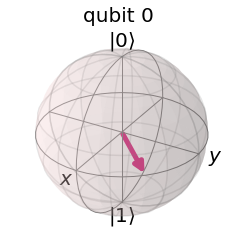

In [9]:
# Circuit for Phase Gates

q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
phase_circ = QuantumCircuit(q,c)

## Initialize to the $|+>$ state by applying H
phase_circ.h(q[0])

# Pick an angle, phi, betwee 0 and 2*pi
pi = np.pi
phi = pi/4 # Change me

# Apply a rotation gate (R_x,R_y,R_z)
phase_circ.u1(phi,q[0])

# Visualize on the bloch sphere
backend = BasicAer.get_backend('statevector_simulator') 
result = execute(phase_circ, backend).result()
psi  = result.get_statevector(phase_circ)
qiskit.visualization.plot_bloch_multivector(psi)

## 2 | Multiple Gates

### Horizontal Gates

Suppose we want to act multiple gates in a row (horizontally) on one qubit. What are the rules to determine what happens to the state? Simply, the following two circuits are equivalent:
![Multiple gates](multiple-gates.jpg)
Because the above circuit has the following state evolution $|\psi\rangle\to A|\psi\rangle\to BA|\psi\rangle$. Thus, one can shorten the depth of circuits by replacing a string of single qubit gates on the same quantum wire with one gate that represents the matrix multiplication of all the matrices in reverse order (as long as there are no entangling gates in the way - more on this latter).

This now explains why, when we applied two Hadamard gates, the initial state was returned - because $H^2=I$!

Let's verify our new rule using Qiskit. First, let's learn how the Pauli gates multiply:
$$ X^2=Y^2=Z^2=I $$ 
$$ XY = -YX = iZ $$
$$ YZ = -ZY = iX $$
$$ ZX = -XZ = iY $$

The following picture can be useful for remembering the multiplication rules
![Pauli multiplication](pauli-circle.jpg)
For $AB$ you follow the line from $A$ to $B$ to whatever is next and pick up an $i$ or $-i$ depending on if you went with or against the arrow, respectively. For example, $XY=iZ$ because $X$ goes to $Y$ goes to $Z$ and you go with the arrow.

Let's do an example walk through of a gate. Suppose we applied $X$ and then $Y$, this is the same as applying $-iZ$.
![Three equal circuits](three-circuits.jpg)
#### Exercise 2.1 
___
Verify that $YX|+\rangle=-iZ|+\rangle$:
- First, by explicitly multiplying the matrices $Y$ and $X$ to see that the result is -iZ
- Second, by walking through the state evolution. I'll get you started
$$ YX|+\rangle = YX\frac{|0\rangle+|1\rangle}{\sqrt{2}}=Y\frac{|1\rangle+|0\rangle}{\sqrt{2}} = ? $$
and does this equal $-iZ\frac{|0\rangle+|1\rangle}{\sqrt{2}}$. Refer to the rules of how $X,Y,Z$ act on the basis states $|0\rangle$ and $|1\rangle$.
- Third, by using Qiskit below:

$\textit{Hint:}$ Remember that global phases don't matter.
___

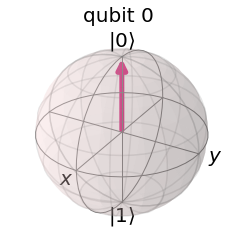

In [10]:
"""Exercise 2.1"""
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q,c)

# Initialize to the $|+>$ state by applying H
## your code here ##

# Apply a X followed by Y, then just Z. Do they give the same outcome?
## your code here ##

# Visualize on the bloch sphere
backend = BasicAer.get_backend('statevector_simulator') 
result = execute(circ, backend).result()
psi  = result.get_statevector(circ)
qiskit.visualization.plot_bloch_multivector(psi)

#### Exercise 2.2 
___
When you multiply rotation gates, it's the same as just doing each of the rotations in succesion. Verify this:
- Show that $R_x(\theta)R_x(\phi)=R_x(\theta+\phi)$ through matrix multiplication.
- Convince yourself geometrically that $R_z(\pi/2)R_x(\theta)|0\rangle$ should equal $R_y(\theta)|0\rangle$ and then show that it's true (up to a global phase) through matrix-vector multiplication.
- Check the above two equalities using Qiskit below.
___

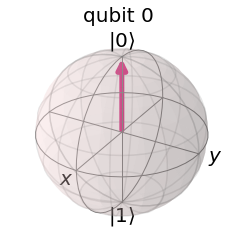

In [11]:
"""Exercise 2.2"""
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circ = QuantumCircuit(q,c)

# Initizalize to $|+>$ state for R_x(theta)R_x(phi)=R_x(theta+phi) and 
# initialize to $|0>$ state for R_x(theta)R_z(pi/2)=R_y(theta)
## your code here ##

# Apply R_x(theta)R_x(phi), then R_x(theta+\phi), check if the Bloch vector is the same
# Then apply R_x(theta)R_z(pi/2), then R_y(theta), check if the Bloch vector is the same 
# Make sure you have the right initial state
# theta = # pick any angle
# phi = # pick any angle
## your code here ##

# Visualize on the bloch sphere
backend = BasicAer.get_backend('statevector_simulator') 
result = execute(circ, backend).result()
psi  = result.get_statevector(circ)
qiskit.visualization.plot_bloch_multivector(psi)

#### Exercise 2.3 
___
Verify the following identities
- $HXH = Z$
- $HYH = -Y$
- $HZH = X$ ($\textit{Hint:}$ What is $H^{\dagger}$?)
- $SXS^{\dagger}=Y$
- $S^{\dagger}YS=X$.
___

### Vertical Gates

Now we're going to extend our circuit vertically, to include multiple qubits. Again, each line represents a quantum two-level system. The rule for working things out vertically involves the tensor product. The following circuit says that gate $A$ is applied to the first qubit, which is in state $|\psi\rangle$ and that gate $B$ is applied to the second qubit, which is in state $|\phi\rangle$.
![Two qubit circuit](two-qubit-circuit.jpg)
The mathematical descripction of this circuit (Qiskit convention) is

$$ B|\phi\rangle\otimes A|\psi\rangle = (B\otimes A)\left(|\phi\rangle\otimes|\psi\rangle\right)\equiv(B\otimes A)|\phi\psi\rangle$$ 

The order that one takes the tensor products (in Qiskit) is from bottom to top. That is, the bottom qubit is all the way on the left while the top qubit is all the way on the right. (Note that this is opposite of the convention found in most text-books)
Recall that the tensor product is an operation between two matrices. For example, if

$$ A = \begin{pmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{pmatrix} \hspace{5mm}
   B = \begin{pmatrix} b_{00} & b_{01} \\ b_{10} & b_{11} \end{pmatrix} $$ 
   
Then

$$ A \otimes B = \begin{pmatrix} a_{00}B & a_{01}B \\ a_{10}B & a_{11}B \end{pmatrix} 
               = \begin{pmatrix} a_{00}b_{00} & a_{00}b_{01} & a_{01}b_{00} & a_{01}b_{01} \\ 
                                 a_{00}b_{10} & a_{00}b_{11} & a_{01}b_{10} & a_{01}b_{11} \\ 
                                 a_{10}b_{00} & a_{10}b_{01} & a_{11}b_{00} & a_{11}b_{01} \\
                                 a_{10}b_{10} & a_{10}b_{11} & a_{11}b_{10} & a_{11}b_{11} \end{pmatrix} $$
                                 
A couple things to notice: One, that $A \otimes B$ does not necessarily equal $B \otimes A$. And two, that
$(A \otimes B)(C \otimes D)=(AC)\otimes(BD)$, which is the property I used to show that $ B|\phi\rangle\otimes A|\psi\rangle = (B\otimes A)\left(|\phi\rangle\otimes|\psi\rangle\right)$. Tensor products work similarly for states: If

$$ |\psi\rangle = \begin{pmatrix} \psi_0 \\ \psi_1 \end{pmatrix} \hspace{5mm}
   |\phi\rangle = \begin{pmatrix} \phi_0 \\ \phi_1 \end{pmatrix} $$
Then

$$ |\psi\phi\rangle = |\psi\rangle\otimes|\phi\rangle = 
\begin{pmatrix} \psi_0|\phi\rangle \\ \psi_1|\phi\rangle \end{pmatrix} = 
\begin{pmatrix} \psi_0\phi_0 \\ \psi_0\phi_1 \\ \psi_1\phi_0 \\ \psi_1\phi_1 \end{pmatrix} $$

#### Exercise 2.4
___
- Run the code below to see the circuit.
- Comment out the draw section, un-comment the histogram section. Run the code.
- Prove that $X|0\rangle\otimes H|0\rangle = \frac{|10\rangle+|11\rangle}{\sqrt{2}}$ by using the rules of how $X$ and $H$ act on $|0\rangle$ and $|1\rangle$.
- Show that $X\otimes H= \frac{1}{\sqrt{2}}\begin{pmatrix} 0 & 0 & 1 & 1 \\ 0 & 0 & 1 & -1 \\ 1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0 \end{pmatrix}$ and that $|00\rangle=|0\rangle\otimes|0\rangle = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}$. Then multiply them and show that it give $\frac{1}{\sqrt{2}}\begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \end{pmatrix}$. Why is this equal to $\frac{|10\rangle+|11\rangle}{\sqrt{2}}$?
- Does the histogram reflect the final state?
___

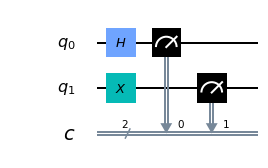

In [12]:
"""Exercise 2.4"""
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q,c)

# Apply gates
circ.h(q[0])
circ.x(q[1])

# Measure 
circ.measure(q,c)

# Draw
circ.draw(output = 'mpl')

### Controlled Gates

Controlled gates are two-qubit gates (they act on two-qubits at the same time). In the circuit below, the qubit in state $|a\rangle$ is the $\textit{control}$ qubit while the qubit in state $|b\rangle$ is the $\textit{target}$ qubit. The control qubit remains unchanged, no matter what it is. The target qubit either stays the same if the control qubit is $|0\rangle$ or goes to $U|0\rangle$ if the control qubit is $|1\rangle$. This is depicted in the diagram below
![Controlled gate](cgate.jpg)
That is
$$ |ba\rangle\to\begin{cases}|ba\rangle, \ \text{if} \ |a\rangle = |0\rangle \\ U|b\rangle\otimes|a\rangle, \ \text{if} \ |a\rangle = |1\rangle \end{cases} $$

Summing up the different cases
$$|00\rangle\to|00\rangle \hspace{5mm} |10\rangle\to|10\rangle$$
$$|01\rangle\to U|0\rangle\otimes|1\rangle \hspace{5mm} |11\rangle\to U|1\rangle\otimes|1\rangle$$

We use the notation $CU_{ij}$ to mean controlled gate where $i$ denotes the control qubit and $j$ denotes the target qubit.
The outer-product representation for each of these looks like
$$CU_{01}=|0\rangle\langle0|\otimes I + |1\rangle\langle1|\otimes X$$
$$CU_{10}=I\otimes|0\rangle\langle0| + X\otimes|1\rangle\langle1|$$

#### CNOT
One important example of a control gate is the $\textbf{CNOT}$ which stands for controlled-NOT. It looks like this:
![CNOT Gate](cnot.jpg)
It is implemented in Qiskit as
``` python
circ.cx(controlled qubit, target qubit)
```
Sometimes it is written more specifically as $\text{CNOT}_{ij}$ where $i$ denotes the index of the control qubit and $j$ denotes the index of the target qubit. The qubits are numbered $0,1,2,...$ from top to bottom.
It is the case of controlled-$U$ when $U=X$. Recall that $X$ flips the qubit that it acts on. Thus, the target doesn't flip if the control is $|0\rangle$ and flips if the control is $|1\rangle$. It's action can be written in the following way:
![CNOT explained](cnot-explained.jpg)
where $b\oplus a = b+a\mod2$.
Going through each case individually
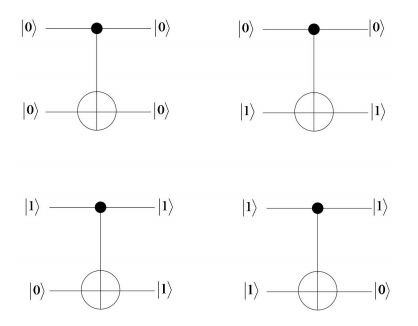

##### Control Qubit in Superposition
But what if the control qubit is in a superposition of $|0\rangle$ and $|1\rangle$? Is $U$ applied to the target or not? The answer: the target qubit is put into a superposition of both $U$ being applied to it, and $U$ not being applied to it. This is illustrated in the following exercise.

#### Exercise 2.5 
___
Consider the following circuit:

![Bell circuit](bell-circuit.jpg)

- What is the final state? Use the state walk-through method to figure it out. By this, I mean write down the state after each column of gates is applied. I'll get you started:

$$|00\rangle\to |0\rangle\otimes H|0\rangle=\frac{|00\rangle+|01\rangle}{\sqrt{2}}\to CNOT_{01}\frac{|00\rangle+|01\rangle}{\sqrt{2}}=\frac{CNOT_{01}|00\rangle+CNOT_{01}|01\rangle}{\sqrt{2}}=...$$
- This circuit is implemented with Qiskit below. Check the final state by looking at the counts histogram.

Note that the final state is $\textit{entangled}$. That is, it cannot be written as a tensor product of states. For example
$\frac{|00\rangle+|01\rangle}{\sqrt{2}}$ is not entangled because it can be written as $|0\rangle\otimes\frac{|0\rangle+|1\rangle}{\sqrt{2}}$. However, $\frac{|01\rangle+|10\rangle}{\sqrt{2}}$ is entangled because there's no way to write it as the tensor product of states. Go ahead, try!

- Now replace the Hadamard gate in the circuit with $R_y(\theta)$ for different angles $\theta$? What happens to the histogram? Can you write down a mathematical expression for the probabilites in terms of $\theta$?
___

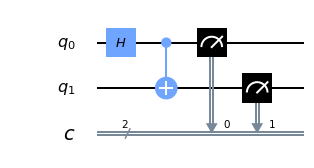

In [13]:
"""Exercise 2.5"""
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q,c)

# Create circuit
circ.h(q[0])
circ.cx(q[0],q[1])

# Measure 
circ.measure(q,c)

# Draw
circ.draw(output = 'mpl')

#### Exercise 2.6
___
Some quantum devices are such that CNOTs can only be implimented one way. That is, $CNOT_{ij}$ can be executed but not $CNOT_{ji}$. We can get around this problem with the following identity

![Flip CNOT](flip-cnot.jpg)

Prove this with the following steps:
- Recall from Exercise 2.3 that $HXH = Z$ and use this to transform the CNOT into a controlled-Z. (It's easiest if you write CNOT in its outer-product form).
- Show that
![CZ](cz.jpg)
- Use the same trick as used in the first step to complete the proof.
___

#### SWAP

The $\textbf{SWAP}$ gate does exactly what it sounds like, it swaps the states of two qubits. It is depicted as
![SWAP gate](swap.jpg)

#### Exercise 2.7
___
Show that the $\textbf{SWAP}$ gate can be implemented as 
![SWAP with CNOTs](swap-with-cnots.jpg)
$\textit{Hint:}$ There are a few ways to do this: 
- One is to write the first and third CNOTs in their outer-product representation $CNOT_{01}=|0\rangle\langle0|\otimes I +|1\rangle\langle1|\otimes X$, the second CNOT as $I\otimes|0\rangle\langle0|+X\otimes|1\rangle\langle1|$, multiply the three, and then convince yourself that the result is the outer-product representation of the swap gate. 
- Another way is to write the CNOT's as matrices (which you can figure out from the outer-product representation) and multiply them. 
- A third way is to track what happens to the state as it passes through the circuit: $|a\rangle|b\rangle\to|a\rangle|b\oplus a\rangle\to|a+(b\oplus a)\rangle|b\oplus a\rangle=|b\rangle|b\oplus a\rangle\to...$
Now look at the code below: Look at the histogram without the SWAP and then with the SWAP. Does what happens make sense? 
___

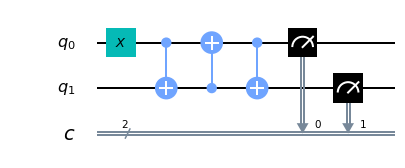

In [14]:
"""Exercise 2.7"""
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q,c)

# Initialize to state |01>
circ.x(q[0])

# Create SWAP
circ.cx(q[0],q[1]) 
circ.cx(q[1],q[0]) 
circ.cx(q[0],q[1]) 
## or ##
# circ.swap(q[0],q[1])

# Measure 
circ.measure(q,c)

# Draw
circ.draw(output = 'mpl')

By the way, one important application of the SWAP gate is to allow for the application of a two-qubit gate (for example, the CNOT) that aren't connected by the topology of the quantum circuit. For example, if your quantum computer only has linear connectivity (qubit 1 can connect to 2 and 2 to 3 but not 1 to 3) and you want to implement at 2-qubit gate between the qubit 1 and 3, you can swap 2 and 3, apply the 2-qubit gate between 1 and 2, and then swap 2 and 3 back. The circuit is drawn with the code below. Play around with the initial state by uncommenting some of the X gates, which will change the corresponding qubit from its default state of $|0\rangle$ to $|1\rangle$. Does the circuit do what you expect?

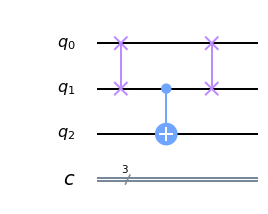

In [15]:
"""Exercise 2.7"""
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q,c)

# Initial state
# circ.x(q[0])
# circ.x(q[1])
# circ.x(q[2])

# Circuit
circ.swap(q[0],q[1])
circ.cx(q[1],q[2])
circ.swap(q[0],q[1])

# Draw
circ.draw(output = 'mpl')

#### Controlled-U in terms of CNOTs

One valid question is, how do we implement the general, controlled $U$ gate? To do it, one must first decompose $U$ into the product of 3 rotations (which can always be done!)

$$ U = e^{i\alpha}R_z(\beta)R_y(\gamma)R_z(\delta) = e^{i\alpha}\begin{pmatrix} e^{-i(\beta+\delta)/2}\cos\gamma/2 & -e^{-i(\beta-\delta)/2}\sin\gamma/2 \\ e^{i(\beta-\delta)/2}\sin\gamma/2 & e^{i(\beta+\delta)/2}\cos\gamma/2 \end{pmatrix} $$ 

Then, $CU_{01}$ can be implimented as 
![Controlled unitary circuit](controlled-unitary-circuit.jpg)
where $A=R_z(\beta)R_y(\gamma/2)$, $B=R_y(-\gamma/2)R_z(-(\delta+\beta)/2)$, and $C=R_z((\delta-\beta)/2)$.

#### Exercise 2.8 (Advanced)
___
Prove the above decomposition:
- Show that $CBA=I$
- Show that $XBX=R_y\left(\frac{\gamma}{2}\right)R_z\left(\frac{\beta+\delta}{2}\right)$. $\textit{Hint:}$ Insert an $XX$ between the $R_y$ and $R_z$ in $B$ (which we can do because $X^2=I$). And then think about what $XR_y(\theta)X$ and $XR_z(\theta)X$ are. (Write $e^{i\theta P}=\cos\theta I+i\sin\theta P$ for $P$ being a Pauli matrix and then calculate what $XYX$ and $XZX$ are.)
- Show that $CXBXA=R_z(\beta)R_y(\gamma)R_z(\delta)$
- Show that the above two equations prove the decomposition.
___


## 3 | Advanced Gates

It turns out that all we need in order to implement any gate (no matter how many qubits it acts on) are one and two qubit gates. The proof is long and complicated but you can look it up in section 4.5.1 of Neilson and Chuang's book: $\textit{Quantum Computation and Quantum Information}$ (10th anniversery edition). Still, let's look at a few examples of this fact.

### Controlled-Controlled-U

A double controlled $U$ gate, or $CCU$ gate means that both the control qubits have to be $|1\rangle$ in order for $U$ to be applied to the target qubit. It can be decomposed as
![Controlled-controlled unitary](ccu.jpg)
where $V=\sqrt{U}$.

#### Exercise 3.1
___
Prove the above decomposition by walking through what happens to the state, starting with $|000\rangle, |001\rangle, |010\rangle, |011\rangle, |100\rangle, |101\rangle, |110\rangle$, and $|111\rangle$, and show that $U$ is applied to the third qubit only when the first two are $|1\rangle$. That is, the only two initial states that are affected are $|110\rangle\to|11U0\rangle$ and $|111\rangle\to|11U1\rangle$.
___

### Simulation of quantum systems

One application of quantum computing is the simulation of quantum systems themselves. The comlexity of the simulation of a quantum systems grows exponential with the size of the problem and so becomes intractable for classical computers. However, quantum computers are quantum systems and so the complexity only scales linearly. Let's see how to simulate the time evolution operator of a Hamiltonian made up of Pauli matrices (second-quantized fermionic Hamiltonians can be mapped to linear combinations of tensor-product strings of Paulis). The time evolution operator is
$ U(t)=e^{-iHt/\hbar} $ and it evolves states forward in time $U(t)|\psi(0)\rangle=|\psi(t)\rangle$. Consider the Hamiltonian $H=Z\otimes Z\otimes Z$. The time evolution operator can then be implimented as
![ZZZ Evolution](z3-evolution.jpg)
This technique can be extended to arbitary number of $Z$s. 

#### Exercise 3.2 
___
Prove the above decomposition:
- Show that $(Z\otimes Z\otimes Z)^2=I$.
- Why does this imply that $e^{-i(Z\otimes Z\otimes Z)t/\hbar}=\cos(t/\hbar)(I\otimes I\otimes I) -i\sin(t/\hbar)(Z\otimes Z\otimes Z)?$ 
- Notice that $Z\otimes Z\otimes Z$ has as its eigenvalues, the total parity of the state that it acts on (1 if the number of 1s in the state is even and -1 if the number of 1s in the state is odd.
- Convince yourself that the first two CNOTs in the circuit encodes the total parity into the third qubit (0 if the number of qubits that are in state $|1\rangle$ is even and 1 if the number of qubits that are in state $|1\rangle$ is odd.)
- Find out what $R_z(\theta)$ does to $|0\rangle$ and $|1\rangle$.
- Put it all together to complete the proof.
- Why are the last two CNOTs needed?
___

To simulate Hamiltonians with other Pauli operators, we can use identities from Exercise 2.3 - namely, $X=HZH$ and $Y=SXS^{\dagger}$. These two imply $SHZHS^{\dagger}=Y$. Note that 

$$ e^{X\otimes X} = e^{(HZH)\otimes(HZH)} = e^{(H\otimes H)(Z\otimes Z)(H\otimes H)}= (H\otimes H)e^{Z\otimes Z}(H\otimes H) $$ 

where the last step comes from the fact that $(H\otimes H)^n=I$ for all $n$ and can be proved by writing out the Taylor expansion for $e^{(H\otimes H)(Z\otimes Z)(H\otimes H)}$. Thus, using the identities above, the fact that surrounding a $\text{CNOT}_{ij}$ by Hadamards flips it to a $\text{CNOT}_{ji}$, and that $H^2=I$, we derive that
![XX Evolution](xx-evolution.jpg)
This technique can be extended to tensor-product strings of arbitrary Paulis.

#### Exercise 3.3
___
Show that
![YY evolution](yy-evolution.jpg)
___

##### Real-World Time-Evoluton
Let's end with an implementation of the time evolution operator for a real-world Hamiltonian, the coupling of two spins 

$$H=\sigma\cdot\sigma=X \otimes X + Y \otimes Y + Z \otimes Z$$

Note that each of the terms commutes with the other (prove this) and thus we can write $e^{X \otimes X + Y \otimes Y + Z \otimes Z}=e^{X\otimes X}e^{Y\otimes Y}e^{Z\otimes Z}$. Therefore, the time evolution operator $U$ can be expressed as the product of three terms we know the circuits for. The code below plots the probability of each qubit measuring 0 vs time.

In [16]:
# Create circuit
def circuit(t, draw=False):  
    """Returns the counts after executing the """
    q = QuantumRegister(2, 'q')
    c = ClassicalRegister(2, 'c')
    circ = QuantumCircuit(q,c)

    # Initialize to state |10>
    circ.x(q[0])
    
    # Create circuit
    
    # XX
    circ.cx(q[1],q[0])
    circ.rx(np.pi*t,q[1])
    circ.cx(q[1],q[0])
    
    # YY 
    circ.sdg(q[0])
    circ.cx(q[1],q[0])
    circ.ry(np.pi*t,q[1])
    circ.cx(q[1],q[0])
    circ.s(q[0])
    
    # ZZ
    circ.cx(q[0],q[1])
    circ.rz(np.pi*t,q[1])
    circ.cx(q[0],q[1])
    
    # Measure
    circ.measure(q,c)
    
    if draw:
        print(circ.draw())

    # Execute
    shots = 1000
    backend = Aer.get_backend('qasm_simulator')
    result = execute(circ, backend, shots = shots).result()
    counts = result.get_counts(circ)

    return counts, shots

In [17]:
"""Execute the circuit."""
circuit(t=1, draw=False)

({'01': 1000}, 1000)

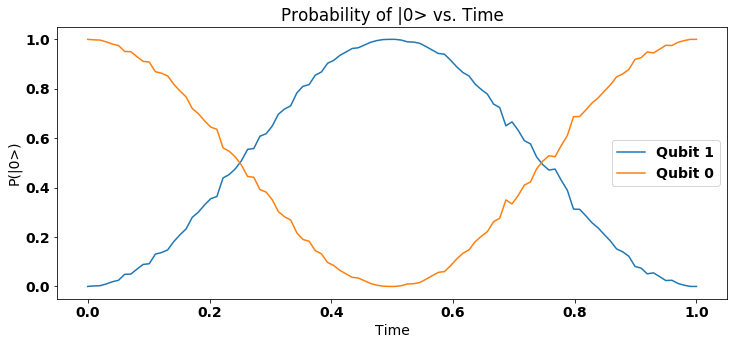

In [18]:
"""Time evolution """

bs = [[0,0],[0,1],[1,0],[1,1]]

# Time 
d = 100 # total time is divided into d steps
t_list = np.linspace(0,1,d)

# Probability
p = np.zeros([d,2]) 
    
# Loop through time 
for t in range(len(t_list)):
    
    # Simulate circuit
    counts, shots = circuit(t_list[t])
    
    # Calculate probabilites from quantum simulation
    for i in range(2):
        for j in range(4):
            if bs[j][2-i-1] == 0:
                if "".join([str(x) for x in bs[j]]) in counts.keys():
                    p[t][i] += counts["".join([str(x) for x in bs[j]])]
    p[t][:] /= shots

# Labels
labels = ['Qubit 1','Qubit 0']

# Plot
plt.rcParams.update({"font.size": 14, "font.weight": "bold"})
plt.figure(figsize=(12, 5))
for i in range(2):
    plt.plot(t_list, p[:,i], label = labels[i])

# Label plots and show
plt.title('Probability of |0> vs. Time')
plt.xlabel('Time')
plt.ylabel('P(|0>)')
plt.legend()
plt.show()

Feel free to play around with the above code. What happens when you change the angle of the $R_x$, $R_y$, and $R_z$ to a different angle, or you make the angles of $R_x$, $R_y$, and $R_z$ different from one another. (which would happen if the coefficients of $X\otimes X$, $Y\otimes Y$, and $Z\otimes Z$ were differnt. What happens if you take away the $Z\otimes Z$ term? What happens if you start with a different initial state? 

You're doing it! You're using a quantum computer to simulate a quantum system! I hope you've enjoyed learning about the gate model. Now go forth and quantum compute!

## Further reading

A. Barenco et al., [Elementary gates for quantum computation](https://arxiv.org/abs/quant-ph/9503016), 1995.